In [1]:
%matplotlib inline


Comparing connectomes on different reference atlases
====================================================

This examples shows how to turn a parcellation into connectome for
visualization. This requires choosing centers for each parcel
or network, via :func:`nilearn.plotting.find_parcellation_cut_coords` for
parcellation based on labels and
:func:`nilearn.plotting.find_probabilistic_atlas_cut_coords` for
parcellation based on probabilistic values.

In the intermediary steps, we make use of
:class:`nilearn.input_data.NiftiLabelsMasker` and
:class:`nilearn.input_data.NiftiMapsMasker` to extract time series from nifti
objects using different parcellation atlases.

The time series of all subjects of the brain development dataset are concatenated and
given directly to :class:`nilearn.connectome.ConnectivityMeasure` for
computing parcel-wise correlation matrices for each atlas across all subjects.

Mean correlation matrix is displayed on glass brain on extracted coordinates.

# author: Amadeus Kanaan


Load atlases
-------------



In [2]:
from nilearn import datasets

yeo = datasets.fetch_atlas_yeo_2011()
print('Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located '
      'at: %s' % yeo['thick_17'])

Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located at: /home/abolfazl/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz


Load functional data
--------------------



In [3]:
data = datasets.fetch_development_fmri(n_subjects=10)

print('Functional nifti images (4D, e.g., one subject) are located at : %r'
      % data['func'][0])
print('Counfound csv files (of same subject) are located at : %r'
      % data['confounds'][0])

Functional nifti images (4D, e.g., one subject) are located at : '/home/abolfazl/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
Counfound csv files (of same subject) are located at : '/home/abolfazl/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv'


Extract coordinates on Yeo atlas - parcellations
------------------------------------------------



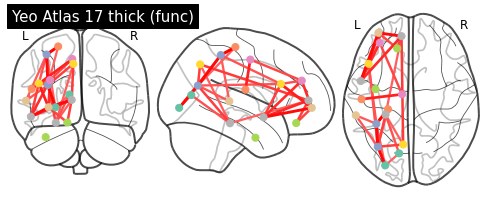

In [9]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(kind='correlation')

# useful for plotting connectivity interactions on glass brain
from nilearn import plotting

# create masker to extract functional data within atlas parcels
masker = NiftiLabelsMasker(labels_img=yeo['thick_17'], 
                           standardize=True,
                           memory='nilearn_cache')

# extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

# calculate correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=yeo['thick_17'])

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, 
                         coordinates,
                         edge_threshold="80%",
                         title='Yeo Atlas 17 thick (func)');

In [5]:
print(type(coordinates))
print(coordinates.shape)
print(coordinates[:5, :])

<class 'numpy.ndarray'>
(17, 3)
[[-26.08691104 -85.02461552  -1.78400214]
 [-11.44628099 -72.29265921  11.63924311]
 [-23.1343885  -25.87231899  62.18399215]
 [-51.01955636 -15.31800211  17.39336049]
 [-33.88532586 -65.32925142  21.65206863]]


Load probabilistic atlases - extracting coordinates on brain maps
-----------------------------------------------------------------



In [6]:
msdl = datasets.fetch_atlas_msdl()

/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Iterate over fetched atlases to extract coordinates - probabilistic
-------------------------------------------------------------------



/home/abolfazl/.local/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:296: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


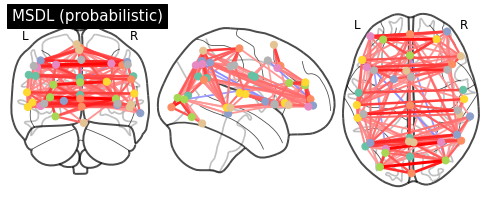

In [8]:
from nilearn.input_data import NiftiMapsMasker

# create masker to extract functional data within atlas parcels
masker = NiftiMapsMasker(maps_img=msdl['maps'], standardize=True,
                         memory='nilearn_cache')

# extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

# calculate correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for probabilistic atlas
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=msdl['maps'])

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, 
                         coordinates,
                         edge_threshold="80%", 
                         title='MSDL (probabilistic)')
plotting.show()